Исследуем набор [данных](https://disk.yandex.ru/d/DqsoMAMSlyd2hQ) о видеоиграх, объем продаж которых составил более 100 000 копий.  

### Задача

1. Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.  
2. Построить график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.  
3. На каких платформах произошло больше всего релизов?  
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?  
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other).  
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.  
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?  

### Описание данных  

Имеются следующие поля:  

- **Rank** – место по объему продаж  
- **Name** – название игры  
- **Platform** – платформа, на которой выпущена игра  
- **Year** – год релиза  
- **Genre** – жанр  
- **Publisher** – издатель  
- **NA_Sales** – продажи в Северной Америке, в млн.  
- **EU_Sales** – продажи в Европе, в млн.  
- **JP_Sales** – продажи в Японии, в млн.  
- **Other_Sales** – продажи в остальном мире, в млн.  
- **Global_Sales** – продажи по всему миру, в млн.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode

In [2]:
# скачиваем данные
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/DqsoMAMSlyd2hQ'                       # ссылка на данные

# получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# считываем данные
games = pd.read_csv(download_url)

In [3]:
games.shape                       # размер данных после чтения

(16598, 11)

In [4]:
# найдём количество пропусков в каждом столбце
for i in games.columns:
    print('Количество пропусков в', i, '=', games[i].isna().sum())

Количество пропусков в Rank = 0
Количество пропусков в Name = 0
Количество пропусков в Platform = 0
Количество пропусков в Year = 271
Количество пропусков в Genre = 0
Количество пропусков в Publisher = 58
Количество пропусков в NA_Sales = 0
Количество пропусков в EU_Sales = 0
Количество пропусков в JP_Sales = 0
Количество пропусков в Other_Sales = 0
Количество пропусков в Global_Sales = 0


Максимальное количество пропусков в колонке Year - 271

In [5]:
games.dropna(inplace=True)        # удаляем пропуски

In [6]:
games.shape                       # размер данных после удаления пропусков

(16291, 11)

#### Посмотрим, какие переменные являются количественными, а какие категориальными.


In [7]:
games.dtypes                      # типы данных

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


```
Rank            Ранговая/порядковая  
Name            Номинативная  
Platform        Номинативная  
Year            Дискретная  
Genre           Номинативная  
Publisher       Номинативная  
NA_Sales        Непрерывная  
EU_Sales        Непрерывная  
JP_Sales        Непрерывная  
Other_Sales     Непрерывная  
Global_Sales    Непрерывная  
```

 #### Описательные характеристики переменной Year и график распределения количества выпущенных игр по годам

In [9]:
print('Мода:   ', games.Year.mode()[0])
print('Медиана:', games.Year.median())
print('Среднее:', round(games.Year.mean(), 1))

Мода:    2009.0
Медиана: 2007.0
Среднее: 2006.4


<AxesSubplot:xlabel='Year', ylabel='count'>

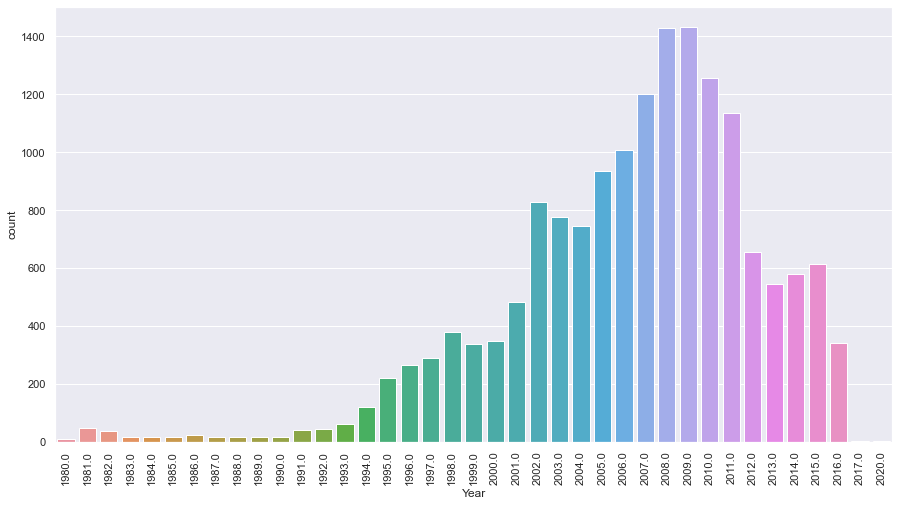

In [10]:
# строим распределение количества продаж по годам
sns.set(rc = {'figure.figsize':(15,8)}) 
plt.xticks(rotation=90)
sns.countplot(data=games, x='Year')

#### Выясним на каких платформах произошло больше всего релизов.
Найдём платформы, частота встречаемости которых составляет более 7%. Выведем их названия в порядке убывания.

In [11]:

total = games.shape[0]                          # общее количество релизов (строк в дф)

releas_frequency_df = (                         # количество по каждому релизу
    games
        .Platform
        .value_counts()
        .to_frame(name='releas_number')
)

releas_frequency_df['releas_frequency'] = (     # добавляем колонку с частотой
    releas_frequency_df
        .releas_number / total        
)

releas_frequency_df = (                         # фильтруем и сбрасываем индексы
    releas_frequency_df
        .query('releas_frequency > 0.07')
        .reset_index()
)

list(releas_frequency_df['index'])              # выводим список платформ по убыванию

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

#### Найдём издателей, игры которых встречаются чаще всего

In [12]:
publisher_frequency_df = (
    games
        .Publisher
        .value_counts()
        .to_frame(name='publisher_frequency')
)
publisher_frequency_df.head()                   # топ 5 издателей

,publisher_frequency
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823


#### Найдём среднее, медиану и стандартное отклонение по продажам игр издателя Nintendo в разных регионах. 

In [13]:
# среднее по продажам Nintendo
(
    games
        .query('Publisher == "Nintendo"')[games.columns[6:]]
        .mean()
        .sort_values(ascending=False)
)

Global_Sales    2.563836
NA_Sales        1.172055
JP_Sales        0.653721
EU_Sales        0.601006
Other_Sales     0.136767
dtype: float64

In [14]:
# медиана по продажам Nintendo
(
    games
        .query('Publisher == "Nintendo"')[games.columns[6:]]
        .median()
        .sort_values(ascending=False)
)

Global_Sales    0.920
NA_Sales        0.375
JP_Sales        0.280
EU_Sales        0.120
Other_Sales     0.030
dtype: float64

In [15]:
# стандартное отклонение по продажам Nintendo
(
    games
        .query('Publisher == "Nintendo"')[games.columns[6:]]
        .std()
        .sort_values(ascending=False)
)

Global_Sales    5.676925
NA_Sales        2.989913
EU_Sales        1.743953
JP_Sales        1.063110
Other_Sales     0.464170
dtype: float64


Как видно, по всем трём показателям лидирует NA (North America).

#### Построим боксплот по продажам Nintendo в Японии по жанрам

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

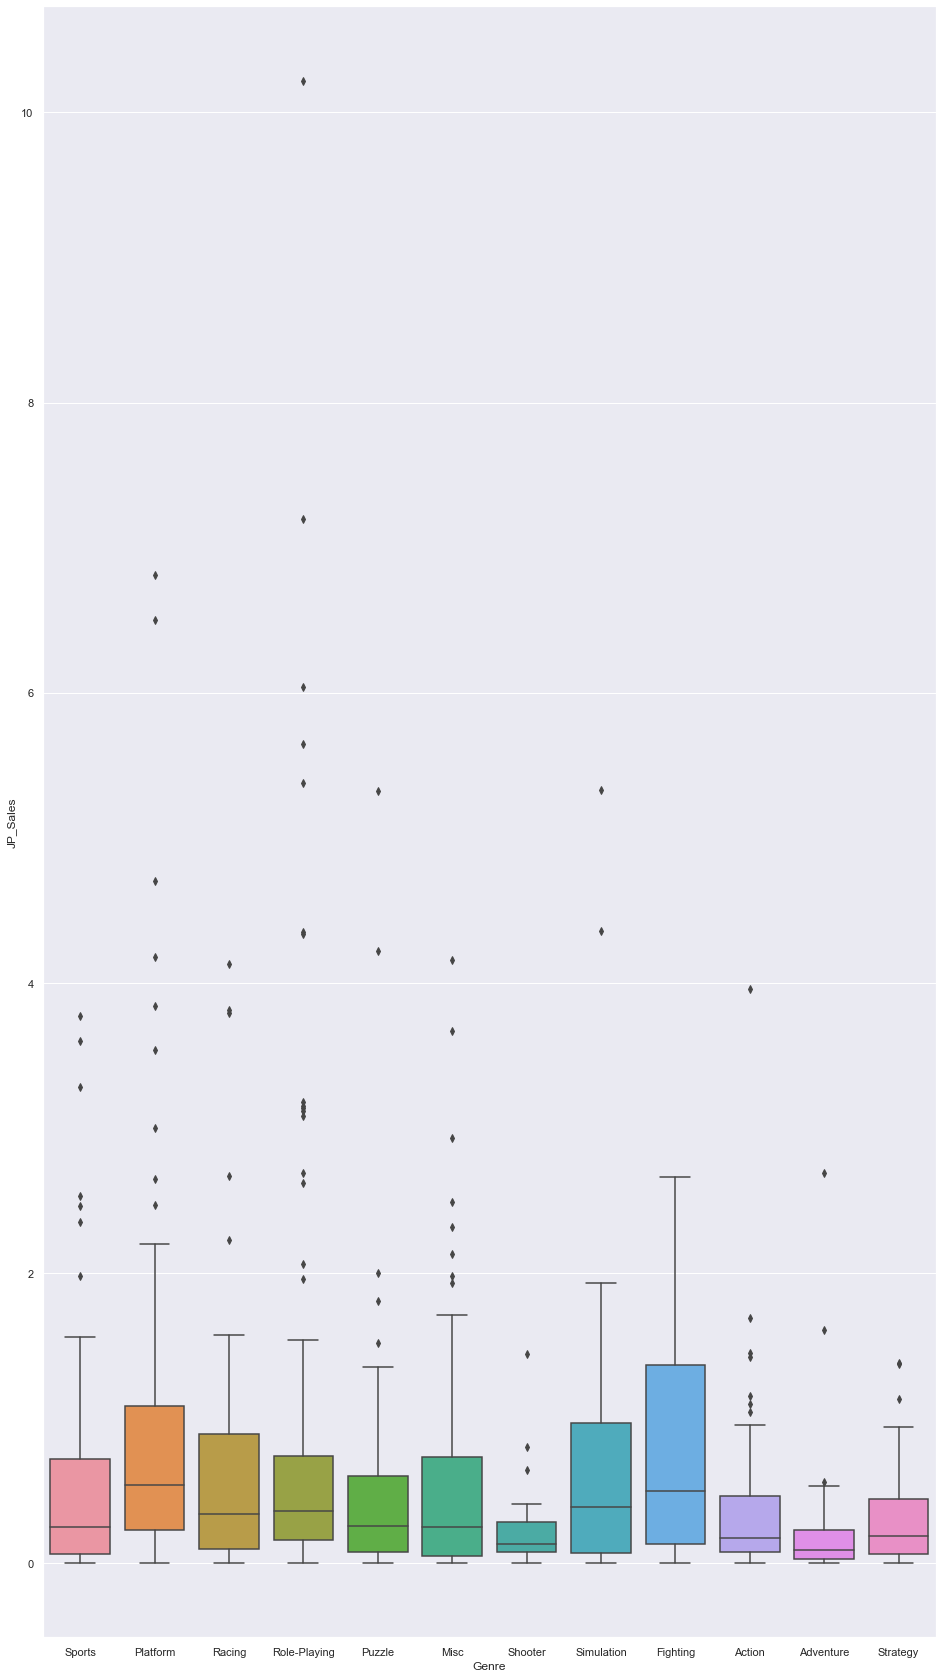

In [16]:
plt.figure(figsize=(16,30))
sns.boxplot(data=games.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales')

По боксплоту можно сделать следующие заключения:
- Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation.
- Межквартильный размах у Strategy меньше, чем у Puzzle.
- Наибольший межквартильный размах наблюдается у игр жанра Fighting.

Сравним среднее значение продаж игр жанров Fighting и Simulation:

In [17]:
print('Среднее значение продаж игр жанра Fighting:  ', 
    games
    .query('Publisher == "Nintendo" and Genre == "Fighting"')
    .JP_Sales
    .mean()
)
print('Среднее значение продаж игр жанра Simulation:', 
    round(
        games
        .query('Publisher == "Nintendo" and Genre == "Simulation"')
        .JP_Sales
        .mean()
        , 2
        )
    
)

Среднее значение продаж игр жанра Fighting:   0.83
Среднее значение продаж игр жанра Simulation: 0.84


#### Визуализируем динамику изменения объема мировых продаж по годам для игр Nintendo
Жанры: Fighting, Simulation, Platform, Racing, Sports.

In [18]:
genre_list = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports'] # список жанров

nintendo_genre_list = (
    games
        .query('Publisher == "Nintendo" and Genre in @genre_list')      # отбираем Nintendo и жанры по списку
        .groupby(['Genre', 'Year'], as_index=False)                     # группируем по жанру и году
        .agg({'Global_Sales': 'sum'})
)

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

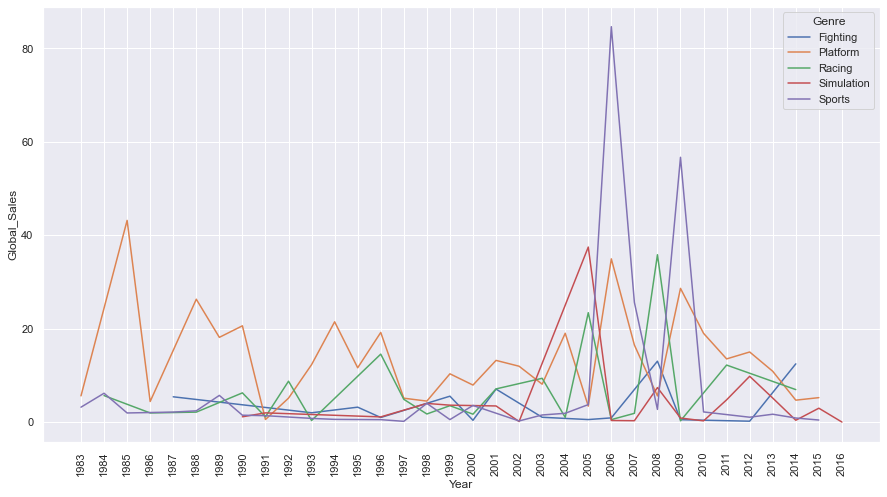

In [19]:
plt.xticks(list(range(1983, 2017)))                                             # сделаем шаг шкалы Х более читаемым
plt.xticks(rotation=90)
sns.lineplot(data=nintendo_genre_list, x='Year', y='Global_Sales', hue='Genre')

На отрезке времени 2005 - 2010 г. было продано наибольшее количество копий игр жанра Sports.